<a href="https://colab.research.google.com/github/niyobern/Google-Colab-notebooks/blob/main/Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks (GANs) for Image Generation

In this tutorial, we will build and train a simple Generative Adversarial Network (GAN) to generate images. We will be using the MNIST dataset, which contains images of handwritten digits. This notebook will walk you through each step, from setting up the environment to generating your own images.

## 1. Setup and Imports

First, we'll need to import the necessary libraries.

In [ ]:
# Import the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import save_image

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


## 2. Preparing the Dataset

We'll use the MNIST dataset for training. The dataset will be downloaded, transformed, and loaded using PyTorch's `DataLoader`.


In [ ]:
# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize images to [-1, 1]
])

# Load the MNIST dataset
dataset = datasets.MNIST(root='mnist_data/', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 131510858.34it/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 17730634.34it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 47795348.91it/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3936059.66it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



## 3. Defining the Generator and Discriminator

Next, we'll define the Generator and Discriminator networks. The Generator will take random noise as input and generate an image, while the Discriminator will classify images as real or fake.


In [ ]:
# Define the Generator network
class Generator(nn.Module):
    def __init__(self, input_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1, 28, 28)

# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x.view(-1, 28*28))

# Initialize the Generator and Discriminator
input_dim = 100
G = Generator(input_dim).to(device)
D = Discriminator().to(device)


## 4. Loss Function and Optimizers

We'll use Binary Cross Entropy loss for both the Generator and Discriminator, and the Adam optimizer for both networks.


In [ ]:
# Loss function
criterion = nn.BCELoss()

# Optimizers
lr = 0.0002
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)


## 5. Training the GAN

Now, we will train the GAN. The training process involves alternating between training the Discriminator and the Generator.


In [ ]:
# Training the GAN
num_epochs = 50
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)

        # Labels for real and fake data
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        D_optimizer.zero_grad()

        # Compute loss with real images
        outputs = D(real_images)
        D_real_loss = criterion(outputs, real_labels)

        # Generate fake images
        z = torch.randn(batch_size, input_dim).to(device)
        fake_images = G(z)

        # Compute loss with fake images
        outputs = D(fake_images.detach())
        D_fake_loss = criterion(outputs, fake_labels)

        # Total Discriminator loss
        D_loss = D_real_loss + D_fake_loss
        D_loss.backward()
        D_optimizer.step()

        # Train Generator
        G_optimizer.zero_grad()

        # Generate fake images
        z = torch.randn(batch_size, input_dim).to(device)
        fake_images = G(z)

        # Compute loss with fake images
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)

        G_loss.backward()
        G_optimizer.step()

        # Print training progress
        if i % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(dataloader)}], D Loss: {D_loss.item():.4f}, G Loss: {G_loss.item():.4f}')

    # Save the generated images after every epoch
    save_image(fake_images, f'gna/fake_images_epoch_{epoch+1}.png')


Epoch [1/50], Step [0/938], D Loss: 0.0071, G Loss: 13.5100
Epoch [1/50], Step [200/938], D Loss: 0.1633, G Loss: 15.3396
Epoch [1/50], Step [400/938], D Loss: 0.3909, G Loss: 8.0860
Epoch [1/50], Step [600/938], D Loss: 0.2128, G Loss: 11.1325
Epoch [1/50], Step [800/938], D Loss: 1.5304, G Loss: 2.0911
Epoch [2/50], Step [0/938], D Loss: 0.8394, G Loss: 1.9767
Epoch [2/50], Step [200/938], D Loss: 1.0872, G Loss: 1.7613
Epoch [2/50], Step [400/938], D Loss: 0.2748, G Loss: 3.6135
Epoch [2/50], Step [600/938], D Loss: 0.1359, G Loss: 3.7943
Epoch [2/50], Step [800/938], D Loss: 0.0192, G Loss: 5.2940
Epoch [3/50], Step [0/938], D Loss: 0.0179, G Loss: 5.4567
Epoch [3/50], Step [200/938], D Loss: 0.1138, G Loss: 6.3964
Epoch [3/50], Step [400/938], D Loss: 0.6100, G Loss: 7.4500
Epoch [3/50], Step [600/938], D Loss: 0.5722, G Loss: 10.8105
Epoch [3/50], Step [800/938], D Loss: 0.1113, G Loss: 5.6825
Epoch [4/50], Step [0/938], D Loss: 0.2386, G Loss: 8.7036
Epoch [4/50], Step [200/938]

## 6. Visualizing the Results

After training, we can visualize the generated images to see how well the GAN has learned to generate realistic images.


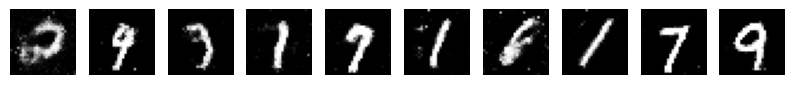

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def show_images(images):
    images = images.cpu().detach().numpy()
    images = (images + 1) / 2.0  # Rescale images from [-1, 1] to [0, 1]
    fig, axes = plt.subplots(1, len(images), figsize=(len(images), 1))
    for i, img in enumerate(images):
        axes[i].imshow(np.squeeze(img), cmap='gray')
        axes[i].axis('off')
    plt.show()

# Generate and visualize images
z = torch.randn(10, input_dim).to(device)
fake_images = G(z)
show_images(fake_images)


## 7. Conclusion

In this tutorial, we implemented a simple GAN to generate images from the MNIST dataset. We went through the process of defining the Generator and Discriminator, setting up the loss function and optimizers, and training the GAN. Finally, we visualized the generated images to assess the quality of the results.

While this example was relatively simple, it provides a solid foundation for understanding how GANs work. From here, you can experiment with more complex datasets, different network architectures, and advanced techniques to improve the quality of generated images.
